In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from textutils import TextProcessor

In [2]:
%time TextProcessor.preprocess_folder('wiki_data/italian', lang='it_con', join=False)

Try to preprocess documents in wiki_data/italian
	---> wiki_data/italian/all.txt
Files are successfully processed to wiki_data/italian/processed
CPU times: user 4min 23s, sys: 8.42 s, total: 4min 31s
Wall time: 4min 36s


In [3]:
with open('wiki_data/italian/processed/all.txt', 'r') as processed_file:
    italian_all = processed_file.read().replace('\n', '')

In [4]:
print "Длина документа: " + str(len(italian_all))
italian_all[:1000]

Длина документа: 190097084


'rmnmlrmnmrmnnfrncshrmnmntpdrgncstttdntstrmnlddpdlprznrmntcprlrnfttlrmnmnstrmntsrbtdrlrmnmnltrrntrnllctgrdglstrmntrfndnclbrpchlsnchssprdcdvtdllnclrmnmmdrnsttrlzztddbnffntdmstlcmlrgnlrmnmtlzzttpcmntnchsprlsczndmscscrrgstrdllrmnmsntttdncnclbrlstmbrmltmnrccdqllrgnstccmprlsstnsnsffttmccncsnltrmllvcmnlsrdnnmdllpdffslrvnmmssdllsctrcnlzndpdsdpdlchcmndndmntcprrglrlsprssnstlzznlgncttpstltdllgncchdnrmdspnbllmnnnnchfnznmccncmntsrvprdrrnntggntvllttvqndlnnsndlprmsrvprlprznpbssdlltstrlscndprqllpltrspttvmntsvlgnlznvrslttvbssvrslttvltcsdllltcstdllmntnznspclzztncssrdllrltvdffclrprbltnnchdllvvntdllrgnltrgclttrncglrmnmsnprgrssvmntscmprsdllchsvrmngnntlzztlrmnmndnsmlqllccdntlmdmnrdmnsnsttprttnnddllccdntdmssnrcrstndcrcmtttcntnpssvvnbsgndnstrmntfclmnttrsprtbldsrnllfnznrlgsltrvrnnqsttpdrmnmgrndllncrccmnfsrmncdfnznmntsmllfrmqlldnmblttrttnglrvcnlsntrhntstrtppnfrtchsstndddqttrttvssncnnslmnlltrmnznnmntcsffttpstslltdstntdlsntrlvrsnndnhplpssbltdmttrnfnznncrtnmrdbrdndvrsntcstntdsttfndnnprsntnllmscclsscndnvnzntqllcrr

In [5]:
from textutils import TextUtils

normalized_dict = TextUtils.get_normalized_dict (
    TextUtils.get_n_gram_dict(italian_all, 1, lang='it_con')
)
ordered_dict = TextUtils.get_ordered_dict(normalized_dict, by='value', reverse=True)

In [6]:
def draw__ordered_dict(dct, size=(10, 8)):
    non_zero_items = np.array(dct)[:,0].astype(str)
    non_zero_values = np.array(ordered_dict)[:,1].astype(np.float64)
    
    plt.figure(figsize=size)
    ax = sns.barplot(x=non_zero_items, y=non_zero_values, color="#666699")
    
    ax.set_ylabel('Probabilities')
    ax.set_title('Text symbols distribution')
    ax.set_xticklabels(non_zero_items)
    
    plt.show()

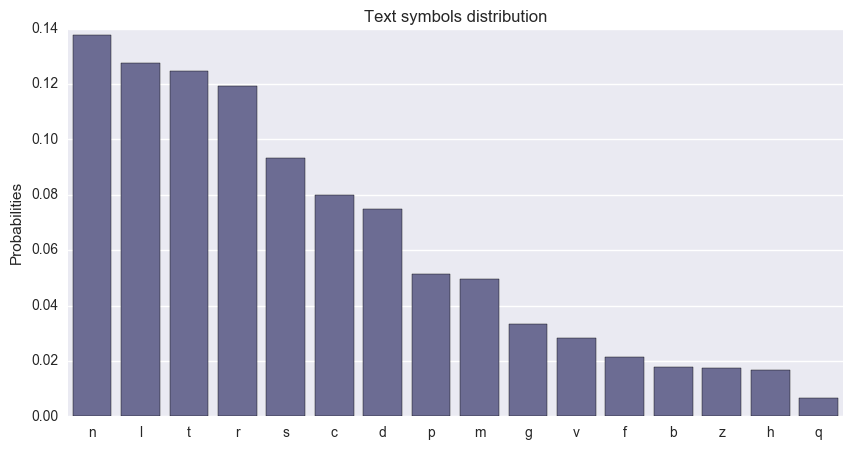

In [7]:
draw__ordered_dict(ordered_dict, (10, 5))

#### Caculate Hurst values for 'n' letter

In [8]:
from textutils import HurstExponent
hurst = HurstExponent(italian_all, 'n')

In [9]:
len(hurst.distances)

26197715

In [10]:
%time hurst.calculate(10000)

CPU times: user 59min 39s, sys: 26.9 s, total: 1h 6s
Wall time: 1h 31s


(array([  14.,   56.,  169.,  319.,  435.,  538.,  439.,  298.,  197.,
          80.,   42.,   16.,    9.,    3.,    2.,    0.,    1.,    0.,
           0.,    1.]),
 array([ 0.28765776,  0.33712693,  0.3865961 ,  0.43606526,  0.48553443,
         0.5350036 ,  0.58447277,  0.63394194,  0.6834111 ,  0.73288027,
         0.78234944,  0.83181861,  0.88128778,  0.93075694,  0.98022611,
         1.02969528,  1.07916445,  1.12863362,  1.17810278,  1.22757195,
         1.27704112]),
 <a list of 20 Patch objects>)

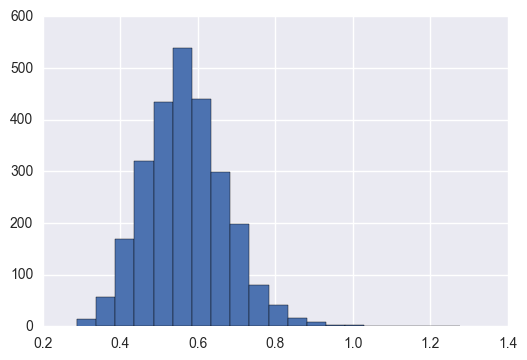

In [12]:
plt.hist(hurst.hurst_values, 20)

In [14]:
with open('hurst_values/italian.txt', 'w') as outfile:
    for v in hurst.hurst_values:
        outfile.write(str(v) + '\n')